Project Description: You are given a dataset which contains satellite images from Texas after Hurricane Harvey. There are damaged and non-damaged building images organized into respective folders. You can find the project 3 dataset on the course GitHub repository here.

Your goal is to build multiple neural networks based on different architectures to classify images as containing buildings that are either damaged or not damaged. You will evaluate each of the networks you develop and produce and select the “best” network to “deploy”. Note that this is a binary classification problem, where the goal it to classify whether the structure in the image has damage or does not have damage.

Part 1: (3 points) Data preprocessing and visualization

You will need to perform data analysis and pre-processing to prepare the images for training. At a minimum, you should:

Write code to load the data into Python data structures

Investigate the datasets to determine basic attributes of the images

Ensure data is split for training, validation and testing and perform any additional preprocessing (e.g., rescaling, normalization, etc.) so that it can be used for training/evaluation of the neural networks you will build in Part 2.

Part 2: (10 points) Model design, training and evaluation

You will explore different model architectures that we have seen in class, including:

A dense (i.e., fully connected) ANN

The Lenet-5 CNN architecture

Alternate-Lenet-5 CNN architecture, described in paper/except (Table 1, Page 12 of the research paper https://arxiv.org/pdf/1807.01688.pdf, but note that the dataset is not the same as that analyzed in the paper.)

You are free to experiment with different variants on all three architectures above. For example, for the fully connected ANN, feel free to experiment with different numbers of layers and perceptrons. Train and evaluate each model you build,and select the “best” performing model.

Note that the input and output dimensions are fixed, as the inputs (images) and the outputs (labels) have been given. These have important implications for your architecture. Make sure you understand the constraints these impose before beginning to design and implement your networks. Failure to implement these correctly will lead to incorrect architectures and significant penalty on the project grade.

Note: You can also try to run the VGG-16 architecture from class, however, you may run into long runtimes and/or memory limits on the VM. It is also possible, depending on the architecture that you choose, that you could also run into memory constraints with any of the other architectures. If you are hitting memory issues, you can try to decrease the batch_size parameter in the .fit() function, as described in the notes.

Part 3: (7 points) Model deployment

For the best model built in part 2, persist the trained model to disk so that it can be reconstituted easily. Develop a simple inference server to serve your trained model over HTTP. There should be at least two endpoints:

A model summary endpoint providing metadata about the model

An inference endpoint that can perform classification on an image. Note: this endpoint will need to accept a binary message payload containing the image to classify and return a JSON response containing the results of the inference.

Package your model inference server in a Docker container image and push the image to the Docker Hub. Provide instructions for starting and stopping your inference server using the docker-compose file. Provide examples of how to make requests to your inference server.


Part 4: (7 points) Write a 3 page report summarizing your work. Be sure to include something about the following:

Data preparation: what did you do? (1 pt)

Model design: which architectures did you explore and what decisions did you make for each? (2 pts)

Model evaluation: what model performed the best? How confident are you in your model? (1 pt)

Model deployment and inference: a brief description of how to deploy/serve your model and how to use the model for inference (this material should also be in the README with examples) (1 pt)

Submission guidelines: Part 1 and Part 2 should be submitted as one notebook file. Part 3 should include a Dockerfile, a docker image (prebuilt and pushed to Docker Hub) and a docker-compose.yml file for starting the container. It should also include a README with instructions for using the container image, docker-compose file and example requests. Part 4 should be submitted as a PDF file.

In-class Project Checkpoint Thursday, April 4th. We will devote the first portion of Thursday’s class to checking in on the project and answering questions.

# Data Preparation

In [38]:
import numpy as np
import os

base_data_path = "./coe379L-sp24/datasets/unit03/Project3/data_all_modified/"
damage_file_set = os.listdir(base_data_path + "damage/")
no_damage_file_set = os.listdir(base_data_path + "no_damage/")
print("damage file entry: ", damage_file_set[0])
print("No damage file entry: ", no_damage_file_set[0])
print()
print("Number of damage files: ", len(damage_file_set))
print("Number of no_damage files: ", len(no_damage_file_set))
print("Total number of files: ", len(damage_file_set) + len(no_damage_file_set))

damage file entry:  -95.613297_29.758008.jpeg
No damage file entry:  -96.93535899999999_28.727813.jpeg

Number of damage files:  14170
Number of no_damage files:  7152
Total number of files:  21322


First we seek preliminary information about our dataset such as the size of each file, the number of files in each class, and more.

In [39]:
# updating file paths for each image belonging to both classes
damage_file_set = [base_data_path + "damage/" + file for file in os.listdir(base_data_path + "damage/")]
no_damage_file_set = [base_data_path + "no_damage/" + file for file in os.listdir(base_data_path + "no_damage/")]
print(f"damage file entry 1: , '{damage_file_set[0]}'")
print(f"No damage file entry 1: , '{no_damage_file_set[0]}'")

damage file entry 1: , './coe379L-sp24/datasets/unit03/Project3/data_all_modified/damage/-95.613297_29.758008.jpeg'
No damage file entry 1: , './coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-96.93535899999999_28.727813.jpeg'

==================== File Size Statistics ====================
Average damage file size : 2.5123kB
Average no_damage file size: 3.0134kB
Range of damage file sizes : 0.9430kB - 5.6470kB
Range of no_damage file sizes: 1.0200kB - 5.1340kB
Standard deviation of damage file sizes : 0.4026kB

==================== File Dimension Statistics ====================
Average damage file dimensions : [128. 128.   3.]
Average no_damage file dimensions: [128. 128.   3.]
Range of damage file dimensions : [128 128   3] - [128 128   3]
Range of no_damage file dimensions: [128 128   3] - [128 128   3]


In [40]:
# calculating file size statistics
print(f"{'='*20} File Size Statistics {'='*20}")
damage_file_sizes = np.array([os.path.getsize(file) for file in damage_file_set])
no_damage_file_sizes = np.array([os.path.getsize(file) for file in no_damage_file_set])
print(f"Average damage file size : {np.mean(damage_file_sizes)/1000:0.4f}kB")
print(f"Average no_damage file size: {np.mean(no_damage_file_sizes)/1000:0.4f}kB")
print(f"Range of damage file sizes : {np.min(damage_file_sizes)/1000:0.4f}kB - {np.max(damage_file_sizes)/1000:0.4f}kB")
print(f"Range of no_damage file sizes: {np.min(no_damage_file_sizes)/1000:0.4f}kB - {np.max(no_damage_file_sizes)/1000:0.4f}kB")
print(f"Standard deviation of damage file sizes : {np.std(damage_file_sizes)/1000:0.4f}kB")
print(f"Standard deviation of no_damage file sizes: {np.std(no_damage_file_sizes)/1000:0.4f}kB")

==================== File Size Statistics ====================
Average damage file size : 2.5123kB
Average no_damage file size: 3.0134kB
Range of damage file sizes : 0.9430kB - 5.6470kB
Range of no_damage file sizes: 1.0200kB - 5.1340kB
Standard deviation of damage file sizes : 0.4026kB
Standard deviation of no_damage file sizes: 0.4114kB


In [41]:
print(f"{'='*20} File Dimension Statistics {'='*20}")
from skimage import io
# calculating file dimension statistics
damage_file_dims = [io.imread(file).shape for file in damage_file_set]
no_damage_file_dims = [io.imread(file).shape for file in no_damage_file_set]
print(f"Average damage file dimensions : {np.mean(damage_file_dims, axis=0)[:2]}")
print(f"Average no_damage file dimensions: {np.mean(no_damage_file_dims, axis=0)[:2]}")
print(f"Range of damage file dimensions : {np.min(damage_file_dims, axis=0)[:2]} - {np.max(damage_file_dims, axis=0)[:2]}")
print(f"Range of no_damage file dimensions: {np.min(no_damage_file_dims, axis=0)[:2]} - {np.max(no_damage_file_dims, axis=0)[:2]}")

==================== File Dimension Statistics ====================
Average damage file dimensions : [128. 128.]
Average no_damage file dimensions: [128. 128.]
Range of damage file dimensions : [128 128] - [128 128]
Range of no_damage file dimensions: [128 128] - [128 128]


We can see that the statistical measures for both image classes are mostly similar. Furthmore, the dimensions for all the images appear to be 128x128 pixels.

#### Now lets visualize the data to get a better understanding of the dataset.

========== DAMAGE ==========


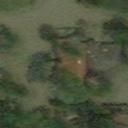

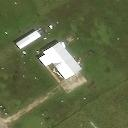


========== NO_DAMAGE ==========


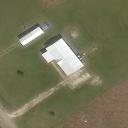

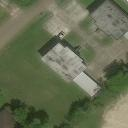

In [42]:
from IPython.display import display, Image
import matplotlib.pyplot as plt

# visualizing fist 5 images from damage class
print(f'{"="*10} DAMAGE {"="*10}')
for i in range(2):
    display(Image(filename=damage_file_set[i]))

print()
print(f'{"="*10} NO_DAMAGE {"="*10}')
# visualizing fist 5 images from no_damage class
for i in range(2):
    display(Image(filename=no_damage_file_set[i]))  

## Image Pre-Proccessing
Because we will explore both ANN and CNN architectures, we will need to pre-process the images differently. For the ANN, we will flatten the images into a single vector. For the CNN, we will keep the images as 2D arrays using helper functions from libraries such as keras. First we will pre-process the images for our ANN model. 

In [43]:
from skimage import io, color

# grayscaling + flattening + normalizing all images
X_file_paths = damage_file_set + no_damage_file_set
X = [color.rgb2gray(io.imread(file)).flatten()/255.0 for file in X_file_paths]
y = np.array([1 for _ in range(len(damage_file_set))] + [0 for _ in range(len(no_damage_file_set))])

from sklearn.model_selection import train_test_split

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X_train, X_test = np.array(X_train), np.array(X_test) # converting to numpy arrays


# one-hot encoding the target variable y_train using keras to_categorical method
from tensorflow.keras.utils import to_categorical

num_classes = 2
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
print(y_train_categorical[:5])
print("1st column represents no_damage class and 2nd column represents damage class")

#### Now that we have processed the images for our ANN architecture, we can re-format our dataset for our CNN architectures. 

# Load & Split

### Next, we can prepare the data set and split into test and train

In [46]:
# clear directory before proceeding
import shutil
try:
    shutil.rmtree("hurricane/train")
    shutil.rmtree("hurricane/test")
except:
    pass

In [47]:
# two classes: damage and no-damage
# create directories for each class within train and test directory

from pathlib import Path

Path("hurricane/train/damage").mkdir(parents=True, exist_ok=True)
Path("hurricane/test/no-damage").mkdir(parents=True, exist_ok=True)

Path("hurricane/test/damage").mkdir(parents=True, exist_ok=True)
Path("hurricane/train/no-damage").mkdir(parents=True, exist_ok=True)

In [53]:
# updating path for each class's data set
damage_file_paths = os.listdir("./coe379L-sp24/datasets/unit03/Project3/data_all_modified/damage")
no_damage_file_paths = os.listdir("./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage")

In [54]:
# split image paths to train and test; 80% in train, 20% in test

import random

print(f'{"="*10} DAMAGE {"="*10}')
train_damage_paths = random.sample(damage_file_paths, int(len(damage_file_paths)*0.8))
print("Train data set image count: ", len(train_damage_paths))
test_damage_paths = [ p for p in damage_file_paths if p not in train_damage_paths]
print("Test data set image count: ", len(test_damage_paths))

overlap = [p for p in train_damage_paths if p in test_damage_paths]
print("Overlap between train and test sets: ", len(overlap))

print(f'\n{"="*10} NO_DAMAGE {"="*10}')
train_no_damage_paths = random.sample(no_damage_file_paths, int(len(no_damage_file_paths)*0.8))
print("Train data set image count: ", len(train_no_damage_paths))
test_no_damage_paths = [ p for p in no_damage_file_paths if p not in train_no_damage_paths]
print("Test data set image count: ", len(test_damage_paths))

overlap = [p for p in train_no_damage_paths if p in test_no_damage_paths]
print("Overlap between train and test sets: ", len(overlap))

========== DAMAGE ==========
Train data set image count:  11336
Test data set image count:  2834
Overlap between train and test sets:  0

========== NO_DAMAGE ==========
Train data set image count:  5721
Test data set image count:  2834
Overlap between train and test sets:  0


In [59]:
# copy files into respective train and test directories
for p in train_damage_paths:
    shutil.copyfile(os.path.join("coe379L-sp24/datasets/unit03/Project3/data_all_modified/damage", p), os.path.join("hurricane/train/damage", p))

for p in test_damage_paths:
    shutil.copyfile(os.path.join("coe379L-sp24/datasets/unit03/Project3/data_all_modified/damage", p), os.path.join("hurricane/test/damage", p))

print(f'{"="*10} DAMAGE {"="*10}')
print("Files in train/damage: ", len(os.listdir("hurricane/train/damage")))
print("Files in test/damage: ", len(os.listdir("hurricane/test/damage")))


for p in train_no_damage_paths:
    shutil.copyfile(os.path.join("coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage", p), os.path.join("hurricane/train/no-damage", p))

for p in test_no_damage_paths:
    shutil.copyfile(os.path.join("coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage", p), os.path.join("hurricane/test/no-damage", p))

print(f'\n{"="*10} NO_DAMAGE {"="*10}')
print("Files in train/no-damage: ", len(os.listdir("hurricane/train/no-damage")))
print("Files in test/no-damage: ", len(os.listdir("hurricane/test/no-damage")))

========== DAMAGE ==========
Files in train/damage:  11336
Files in test/damage:  2834

========== NO_DAMAGE ==========
Files in train/no-damage:  5721
Files in test/no-damage:  1431


In [ ]:
#TODO 